In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('./Datasets/Heart_Disease_UCI/heart.csv')
#https://www.kaggle.com/ronitf/heart-disease-uci
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [4]:
data.notnull().count()

age         303
sex         303
cp          303
trestbps    303
chol        303
fbs         303
restecg     303
thalach     303
exang       303
oldpeak     303
slope       303
ca          303
thal        303
target      303
dtype: int64

In [5]:
data.describe()
data.dtypes

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [6]:
data.corr().sort_values(by='age', axis=1)
data.describe().sort_values(by='std', axis=1)

,thalach,target,slope,restecg,sex,cp,thal,exang,fbs,oldpeak,chol,ca,trestbps,age
age,-0.398522,-0.225439,-0.168814,-0.116211,-0.098447,-0.068653,0.068001,0.096801,0.121308,0.210013,0.213678,0.276326,0.279351,1.000000
sex,-0.044020,-0.280937,-0.030711,-0.058196,1.000000,-0.049353,0.210041,0.141664,0.045032,0.096093,-0.197912,0.118261,-0.056769,-0.098447
cp,0.295762,0.433798,0.119717,0.044421,-0.049353,1.000000,-0.161736,-0.394280,0.094444,-0.149230,-0.076904,-0.181053,0.047608,-0.068653
trestbps,-0.046698,-0.144931,-0.121475,-0.114103,-0.056769,0.047608,0.062210,0.067616,0.177531,0.193216,0.123174,0.101389,1.000000,0.279351
chol,-0.009940,-0.085239,-0.004038,-0.151040,-0.197912,-0.076904,0.098803,0.067023,0.013294,0.053952,1.000000,0.070511,0.123174,0.213678
fbs,-0.008567,-0.028046,-0.059894,-0.084189,0.045032,0.094444,-0.032019,0.025665,1.000000,0.005747,0.013294,0.137979,0.177531,0.121308
restecg,0.044123,0.137230,0.093045,1.000000,-0.058196,0.044421,-0.011981,-0.070733,-0.084189,-0.058770,-0.151040,-0.072042,-0.114103,-0.116211
thalach,1.000000,0.421741,0.386784,0.044123,-0.044020,0.295762,-0.096439,-0.378812,-0.008567,-0.344187,-0.009940,-0.213177,-0.046698,-0.398522
exang,-0.378812,-0.436757,-0.257748,-0.070733,0.141664,-0.394280,0.206754,1.000000,0.025665,0.288223,0.067023,0.115739,0.067616,0.096801
oldpeak,-0.344187,-0.430696,-0.577537,-0.058770,0.096093,-0.149230,0.210244,0.288223,0.005747,1.000000,0.053952,0.222682,0.193216,0.210013


,fbs,sex,exang,target,restecg,thal,slope,ca,cp,oldpeak,age,trestbps,thalach,chol
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,0.148515,0.683168,0.326733,0.544554,0.528053,2.313531,1.399340,0.729373,0.966997,1.039604,54.366337,131.623762,149.646865,246.264026
std,0.356198,0.466011,0.469794,0.498835,0.525860,0.612277,0.616226,1.022606,1.032052,1.161075,9.082101,17.538143,22.905161,51.830751
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,29.000000,94.000000,71.000000,126.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,47.500000,120.000000,133.500000,211.000000
50%,0.000000,1.000000,0.000000,1.000000,1.000000,2.000000,1.000000,0.000000,1.000000,0.800000,55.000000,130.000000,153.000000,240.000000
75%,0.000000,1.000000,1.000000,1.000000,1.000000,3.000000,2.000000,1.000000,2.000000,1.600000,61.000000,140.000000,166.000000,274.500000
max,1.000000,1.000000,1.000000,1.000000,2.000000,3.000000,2.000000,4.000000,3.000000,6.200000,77.000000,200.000000,202.000000,564.000000


In [7]:
data.var()

age           82.484558
sex            0.217166
cp             1.065132
trestbps     307.586453
chol        2686.426748
fbs            0.126877
restecg        0.276528
thalach      524.646406
exang          0.220707
oldpeak        1.348095
slope          0.379735
ca             1.045724
thal           0.374883
target         0.248836
dtype: float64

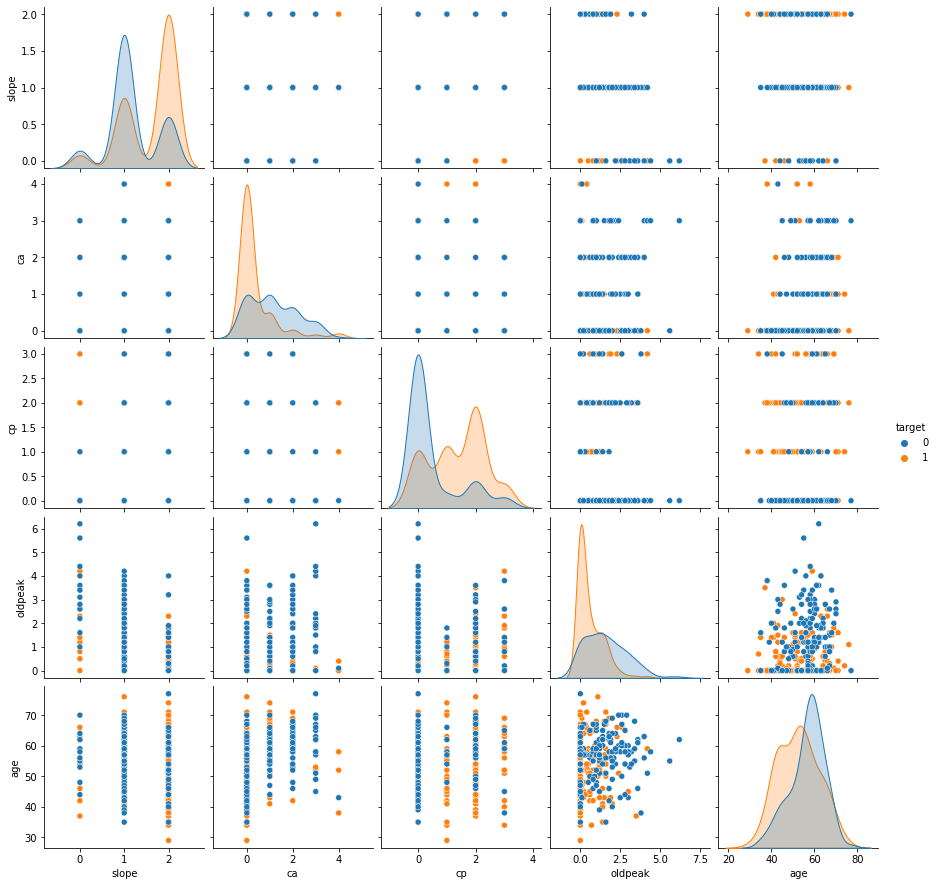

In [8]:
local_columns = ['slope', 'ca', 'cp', 'oldpeak', 'age', 'target']
sns.pairplot(data[local_columns], hue='target')

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [19]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
d_tree_c = DecisionTreeClassifier()

In [20]:
columns_for_d_tree_c = ['slope', 'ca', 'cp', 'oldpeak', 'age']
X_train, X_test, Y_train, Y_test = train_test_split(data[columns_for_d_tree_c], data['target'], stratify=data['target'])

In [22]:
d_tree_c.fit(X_train, Y_train)
tree_prediction = d_tree_c.predict(X_test)
print(classification_report(Y_test, tree_prediction))
print(confusion_matrix(Y_test, tree_prediction))

DecisionTreeClassifier()

              precision    recall  f1-score   support

           0       0.70      0.60      0.65        35
           1       0.70      0.78      0.74        41

    accuracy                           0.70        76
   macro avg       0.70      0.69      0.69        76
weighted avg       0.70      0.70      0.69        76

[[21 14]
 [ 9 32]]


<Figure size 3600x3600 with 0 Axes>

[Text(1312.7476415094338, 2620.9285714285716, 'X[2] <= 0.5\ngini = 0.496\nsamples = 227\nvalue = [103, 124]'),
 Text(756.7216981132075, 2426.785714285714, 'X[1] <= 0.5\ngini = 0.389\nsamples = 106\nvalue = [78, 28]'),
 Text(407.97169811320754, 2232.6428571428573, 'X[3] <= 0.7\ngini = 0.497\nsamples = 50\nvalue = [23, 27]'),
 Text(105.28301886792453, 2038.5, 'X[4] <= 41.5\ngini = 0.287\nsamples = 23\nvalue = [4, 19]'),
 Text(52.64150943396226, 1844.357142857143, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(157.9245283018868, 1844.357142857143, 'X[4] <= 58.5\ngini = 0.172\nsamples = 21\nvalue = [2, 19]'),
 Text(105.28301886792453, 1650.2142857142858, 'gini = 0.0\nsamples = 15\nvalue = [0, 15]'),
 Text(210.56603773584905, 1650.2142857142858, 'X[4] <= 61.5\ngini = 0.444\nsamples = 6\nvalue = [2, 4]'),
 Text(157.9245283018868, 1456.0714285714287, 'X[0] <= 1.5\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(105.28301886792453, 1261.9285714285716, 'gini = 0.0\nsamples = 1\nvalue = [1

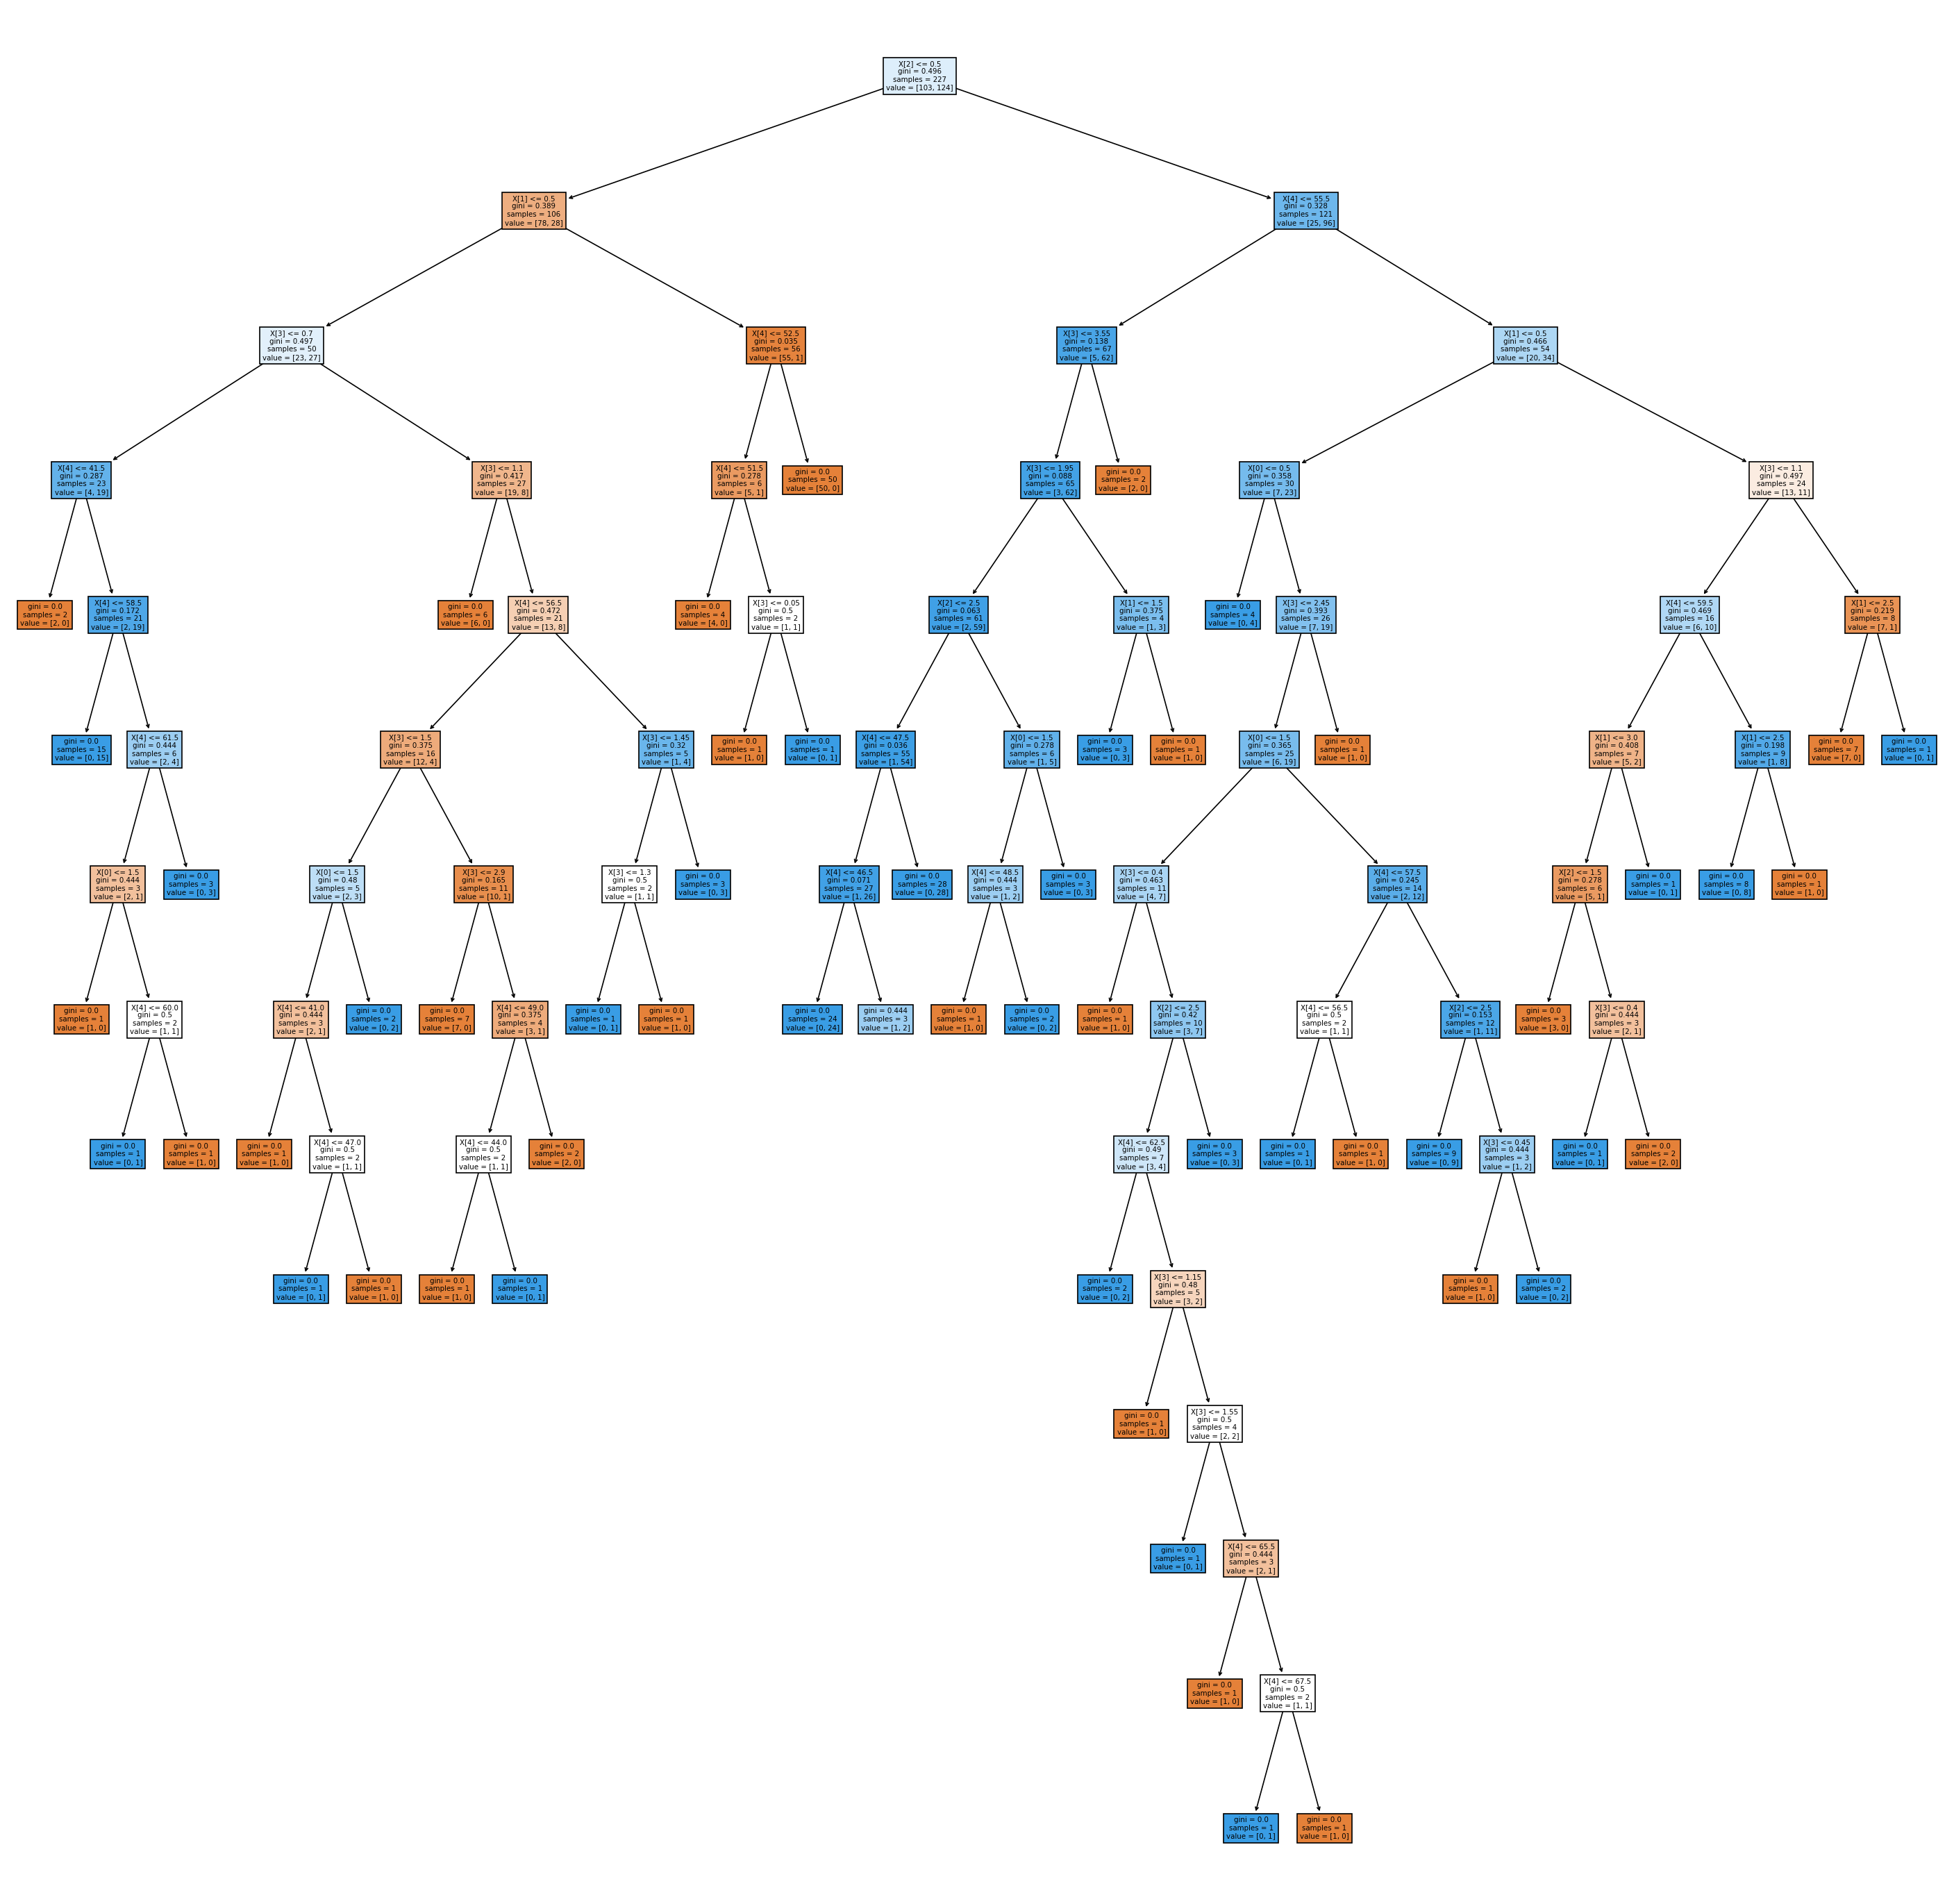

In [29]:
#fig, ax = plt.subplots(figsize=(20, 18), dpi=120)
plt.figure(figsize=(30, 30), dpi= 120)
plot_tree(d_tree_c, filled=True)

In [35]:
columns_for_d_tree_c
print(d_tree_c.feature_importances_)

['slope', 'ca', 'cp', 'oldpeak', 'age']

[0.02550842 0.20825251 0.30122655 0.22764541 0.23736711]
